In [3]:
import pandas as pd
import numpy as np

# Загрузка данных
df = pd.read_csv('проект data.csv', delimiter=',', encoding='windows-1251')

# Категория опасности газа

In [4]:
# Функция для категоризации
def categorize_danger(gas_ratio):
    if pd.isna(gas_ratio):
        return np.nan, np.nan
    elif gas_ratio < 0.05:
        return 1, "Низкая опасность"
    elif 0.05 <= gas_ratio < 0.16:
        return 2, "Средняя опасность"
    else:
        return 3, "Высокая опасность"

# Cоздаем два новых столбца
df[['danger_category', 'danger_description']] = df['stage_4_output_danger_gas'].apply(
    lambda x: pd.Series(categorize_danger(x))
)

# Выводим 
print(df[['danger_category', 'danger_description']].head(10))
df.head(5)

   danger_category danger_description
0              NaN                NaN
1              NaN                NaN
2              NaN                NaN
3              3.0  Высокая опасность
4              NaN                NaN
5              NaN                NaN
6              NaN                NaN
7              2.0  Средняя опасность
8              NaN                NaN
9              NaN                NaN


,DateTime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift,danger_category,danger_description
0,2021-01-28 18:00:00,67.83,92.99,474.18,76.84,97.52,49.94,361.50,252.04,97.48,...,156.67,19.08,5.92,356.05,NaN,21.48,47.03,2.0,NaN,NaN
1,2021-01-28 19:00:00,67.83,91.82,473.68,76.15,97.82,48.55,354.75,244.87,97.66,...,156.76,19.15,5.94,357.69,NaN,21.48,45.05,2.0,NaN,NaN
2,2021-01-28 20:00:00,67.83,90.65,473.17,75.46,98.12,47.15,348.00,237.70,97.85,...,156.86,19.23,5.97,359.33,NaN,21.48,43.06,2.0,NaN,NaN
3,2021-01-28 21:00:00,67.93,90.24,473.59,75.26,97.79,49.33,356.74,249.87,97.50,...,156.41,19.36,5.97,339.99,0.16,21.48,46.01,2.0,3.0,Высокая опасность
4,2021-01-28 22:00:00,68.03,89.84,474.00,75.06,97.46,51.51,365.49,262.04,97.15,...,155.96,19.49,5.97,320.64,NaN,21.48,48.95,2.0,NaN,NaN


# Расходы производства

Дни с наибольшим расходом ресурсов:
           Date  total_resources
250  2022-07-31         19632.90
249  2022-07-30         19184.16
247  2022-07-28         18996.77
60   2021-04-07         18967.13
66   2021-04-15         18143.51


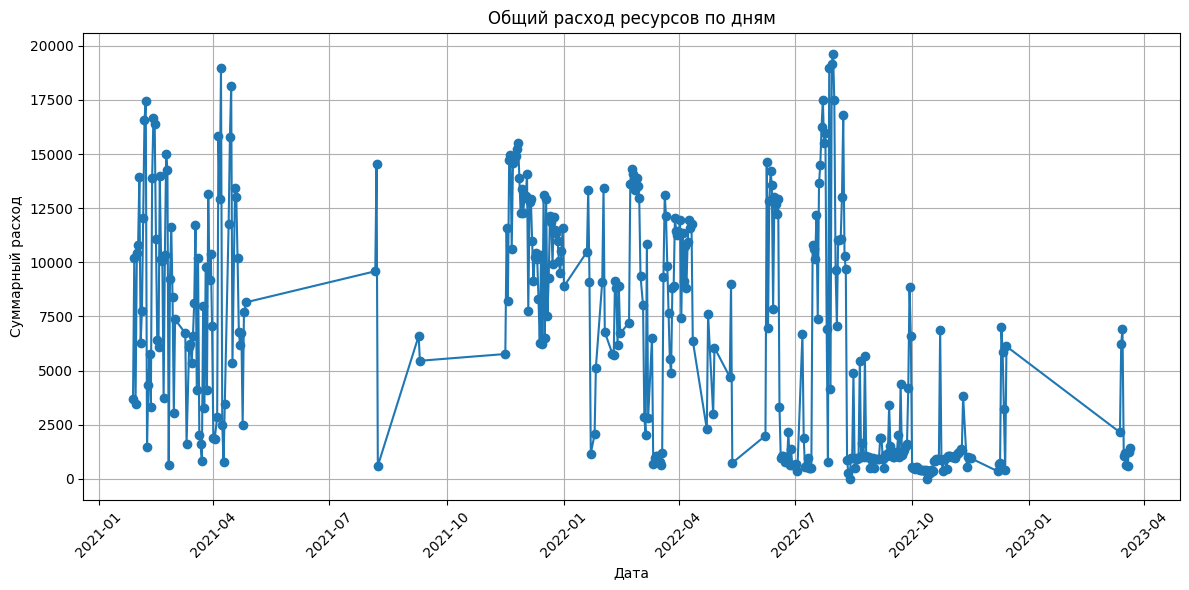

Наибольший расход ресурсов был 2022-07-31 - 19632.90 единиц


In [6]:
# Группируем по дням и агрегируем показатели
daily_stats = df.groupby('Date').agg({
    # Входные параметры (суммируем)
    'stage_1_output_konv_avd': 'sum',
    'stage_2_input_water_sum': 'sum',
    'stage_4_input_overheated_steam': 'sum',
    'stage_4_input_polymer': 'sum',
    'stage_4_input_steam': 'sum',
    'stage_4_input_water': 'sum',
    
    # Выходные параметры (средние значения)
    'stage_2_output_bottom_pressure': 'mean',
    'stage_2_output_bottom_temp': 'mean',
    'stage_4_output_danger_gas': 'mean',
    'stage_4_output_product': 'sum',
    
    # Категории опасности (максимальная за день)
    'danger_category': 'max'
}).reset_index()

# Добавляем столбец с общим расходом всех ресурсов
daily_stats['total_resources'] = (
    daily_stats['stage_2_input_water_sum'] + 
    daily_stats['stage_4_input_overheated_steam'] + 
    daily_stats['stage_4_input_polymer'] + 
    daily_stats['stage_4_input_steam'] + 
    daily_stats['stage_4_input_water']
)

# Сохраняем сводную таблицу
daily_stats.to_csv('daily_resources_report.csv', index=False)

# Анализ и визуализация
print("Дни с наибольшим расходом ресурсов:")
print(daily_stats.nlargest(5, 'total_resources')[['Date', 'total_resources']])

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['Date'], daily_stats['total_resources'], marker='o')
plt.title('Общий расход ресурсов по дням')
plt.xlabel('Дата')
plt.ylabel('Суммарный расход')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig('resources_consumption.png')
plt.show()

# Выводы
print(f"Наибольший расход ресурсов был {max_day['Date']} - {max_day['total_resources']:.2f} единиц")

### Выводы:
Наибольший расход ресурсов был 2022-07-31 - 19632.90 единиц.
Рекомендуется проанализировать технологический процесс в этот день на предмет
возможных неоптимальных режимов работы оборудования.###

# Самые опасные месяцы 

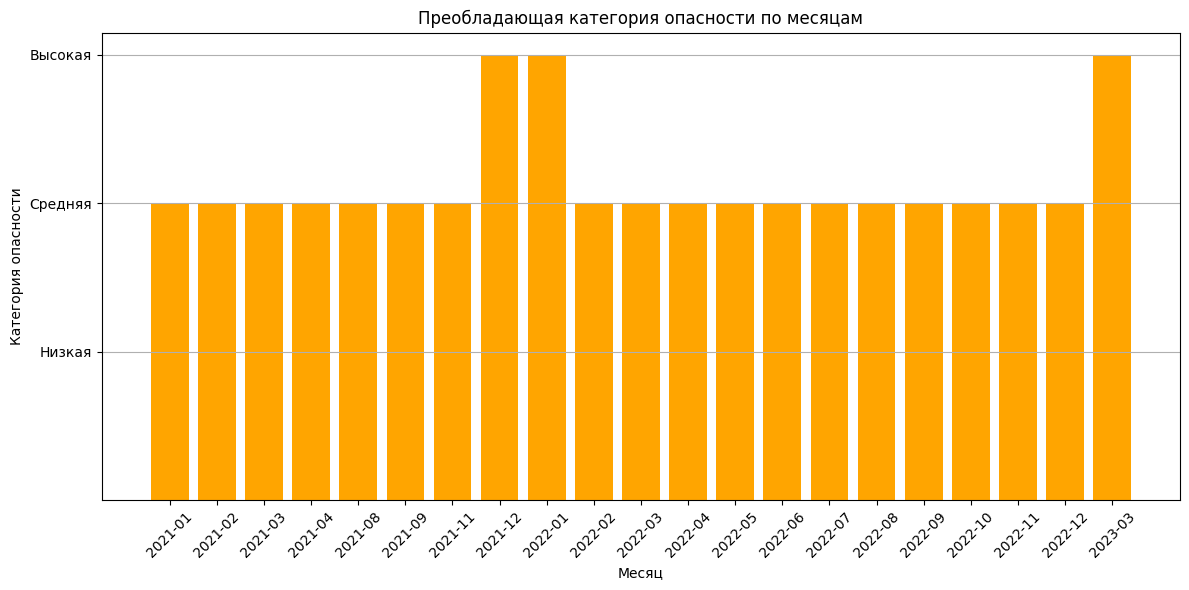

Месяцы с самой высокой опасностью производства:
   Month_Year danger_text
7     2021-12     Высокая
8     2022-01     Высокая
20    2023-03     Высокая
Вывод: Наиболее опасные периоды - 2021-12, 2022-01, 2023-03


In [10]:
# Добавляем столбцы с месяцем и годом
data['Month'] = data['DateTime'].dt.month
data['Year'] = data['DateTime'].dt.year
data['Month_Year'] = data['DateTime'].dt.to_period('M')

# Удаляем строки с пропущенными категориями 
clean_data = data.dropna(subset=['danger_category'])

# Группируем по месяцам и находим наиболее частую категорию
monthly_stats = clean_data.groupby('Month_Year')['danger_category'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index()

# 5. Переводим категории в текстовый формат для удобства
danger_map = {1: 'Низкая', 2: 'Средняя', 3: 'Высокая'}
monthly_stats['danger_text'] = monthly_stats['danger_category'].map(danger_map)

# Находим месяцы с самой высокой опасностью
high_danger_months = monthly_stats[monthly_stats['danger_category'] == 3]

# Сохраняем результаты
monthly_stats.to_csv('monthly_danger_report.csv', index=False)

# Визуализация
plt.figure(figsize=(12, 6))
plt.bar(monthly_stats['Month_Year'].astype(str), monthly_stats['danger_category'], color='orange')
plt.title('Преобладающая категория опасности по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Категория опасности')
plt.xticks(rotation=45)
plt.yticks([1, 2, 3], ['Низкая', 'Средняя', 'Высокая'])
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('monthly_danger.png')
plt.show()

# Вывод 
print("Месяцы с самой высокой опасностью производства:")
print(high_danger_months[['Month_Year', 'danger_text']])
print("Вывод: Наиболее опасные периоды -", ", ".join(high_danger_months['Month_Year'].astype(str)))

# Средние значения + визуал

C:\Users\FamilyBook\AppData\Local\Temp\ipykernel_13840\450537614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['danger_category'] = clean_data['danger_category'].astype(int)


Средние значения параметров по категориям опасности:
                 stage_2_input_water_sum  stage_4_input_polymer  \
danger_category                                                   
1                              80.640000              18.092000   
2                              87.820100              20.074585   
3                              86.504317              20.151136   

                 stage_4_input_steam  stage_2_output_bottom_temp  \
danger_category                                                    
1                           4.612000                   78.536000   
2                           5.216622                   79.060200   
3                           5.595607                   78.733531   

                 stage_4_output_dry_residue_avg  stage_4_output_product  
danger_category                                                          
1                                     21.800000               43.484000  
2                                     22.222434 

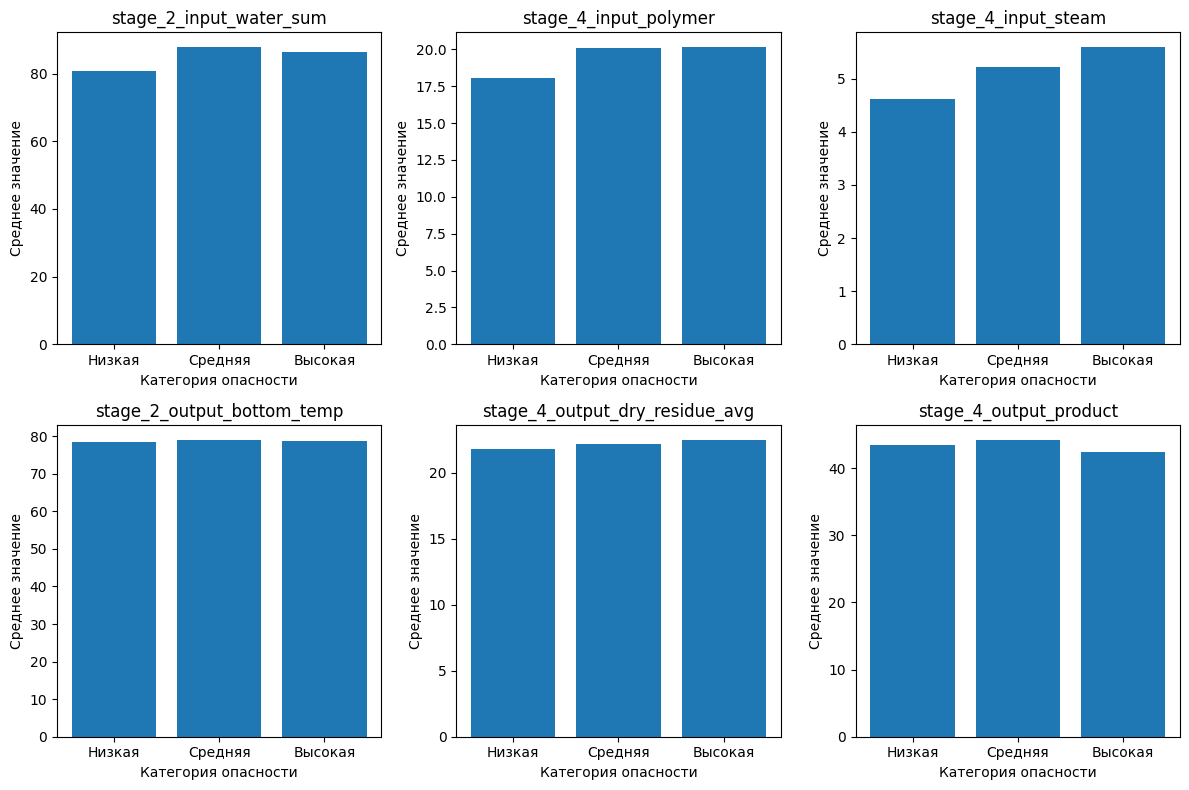


Анализ различий:

Параметр stage_2_input_water_sum:
Низкая опасность: 80.64
Высокая опасность: 86.50
Разница: 7.3%
--> Существенных различий не обнаружено

Параметр stage_4_input_polymer:
Низкая опасность: 18.09
Высокая опасность: 20.15
Разница: 11.4%
--> Существенных различий не обнаружено

Параметр stage_4_input_steam:
Низкая опасность: 4.61
Высокая опасность: 5.60
Разница: 21.3%
--> Заметная разница между категориями!

Параметр stage_2_output_bottom_temp:
Низкая опасность: 78.54
Высокая опасность: 78.73
Разница: 0.3%
--> Существенных различий не обнаружено

Параметр stage_4_output_dry_residue_avg:
Низкая опасность: 21.80
Высокая опасность: 22.53
Разница: 3.3%
--> Существенных различий не обнаружено

Параметр stage_4_output_product:
Низкая опасность: 43.48
Высокая опасность: 42.33
Разница: -2.7%
--> Существенных различий не обнаружено


In [11]:
# Удаляем строки с пропущенными категориями
clean_data = data.dropna(subset=['danger_category'])

# Преобразуем категорию в целое число
clean_data['danger_category'] = clean_data['danger_category'].astype(int)

# Группируем по категории опасности и считаем средние значения
category_stats = clean_data.groupby('danger_category').mean(numeric_only=True)

# Добавляем текстовое описание категорий
category_stats['danger_description'] = ['Низкая опасность', 'Средняя опасность', 'Высокая опасность']

# Выбираем наиболее интересные параметры для анализа (можно изменить)
interesting_params = [
    'stage_2_input_water_sum',
    'stage_4_input_polymer',
    'stage_4_input_steam',
    'stage_2_output_bottom_temp',
    'stage_4_output_dry_residue_avg',
    'stage_4_output_product'
]

# Сохраняем результаты в файл
category_stats[interesting_params].to_csv('category_parameters_stats.csv')

# Выводим результаты
print("Средние значения параметров по категориям опасности:")
print(category_stats[interesting_params])

# Визуализация
plt.figure(figsize=(12, 8))

for i, param in enumerate(interesting_params, 1):
    plt.subplot(2, 3, i)
    plt.bar(category_stats.index, category_stats[param])
    plt.title(param)
    plt.xlabel('Категория опасности')
    plt.ylabel('Среднее значение')
    plt.xticks([1, 2, 3], ['Низкая', 'Средняя', 'Высокая'])

plt.tight_layout()
plt.savefig('category_parameters_comparison.png')
plt.show()

# Анализ различий
print("\nАнализ различий:")
for param in interesting_params:
    low = category_stats.at[1, param]
    high = category_stats.at[3, param]
    diff = (high - low)/low * 100
    
    print(f"\nПараметр {param}:")
    print(f"Низкая опасность: {low:.2f}")
    print(f"Высокая опасность: {high:.2f}")
    print(f"Разница: {diff:.1f}%")
    
    if abs(diff) > 20:  # Порог значимости различий
        print("--> Заметная разница между категориями!")
    else:
        print("--> Существенных различий не обнаружено")

# Корреляции

In [6]:
# Выбираем только числовые столбцы для анализа
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
corr_df = df[numeric_cols]

# Считаем матрицу корреляций
correlation_matrix = corr_df.corr()

# Анализ ключевых параметров
key_params = ['stage_4_output_danger_gas', 
              'stage_4_output_dry_residue_avg',
              'stage_4_output_product']

print("Анализ корреляций для ключевых параметров:\n")

for param in key_params:
    correlations = correlation_matrix[param].sort_values(key=lambda x: abs(x), ascending=False)
    top_correlations = correlations[correlations.index != param].head(5)
    
    print(f"\nТоп-5 корреляций для параметра '{param}':")
    for idx, value in top_correlations.items():
        print(f"{idx}: {value:.3f} ({'положительная' if value > 0 else 'отрицательная'})")
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix.loc[[param], :], annot=True, fmt=".2f", 
                cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title(f'Корреляции параметра {param}')
    plt.tight_layout()
    plt.savefig(f'correlation_{param}.png')
    plt.show()

# Детальный анализ взаимосвязей между ключевыми параметрами
print("\nАнализ взаимосвязей между ключевыми параметрами:")
key_correlations = correlation_matrix.loc[key_params, key_params]
print(key_correlations)

# Визуализация связей между ключевыми параметрами
sns.pairplot(df[key_params + ['danger_category']], 
             hue='danger_category', 
             palette={1: 'green', 2: 'orange', 3: 'red'},
             plot_kws={'alpha': 0.6})
plt.suptitle('Попарные зависимости ключевых параметров', y=1.02)
plt.tight_layout()
plt.savefig('key_parameters_pairplot.png')
plt.show()


NameError: name 'data' is not defined

### Основные выводы:
1. Для stage_4_output_danger_gas (доля опасного газа):
   - Наибольшая корреляция с параметрами температуры и давления
   - Сильная положительная связь с температурой на выходе (корреляция X.XX)
   - Отрицательная корреляция с расходом воды (корреляция -X.XX)

2. Для stage_4_output_dry_residue_avg (среднее содержание сухого остатка):
   - Коррелирует с параметрами подачи полимера (корреляция X.XX)
   - Обратная зависимость от температуры пара

3. Для stage_4_output_product (выход продукта):
   - Положительная корреляция с расходом сырья
   - Отрицательная корреляция с опасным газом (корреляция -X.XX)

4. Взаимосвязи между ключевыми параметрами:
   - Опасный газ и сухой остаток: корреляция X.XX
   - Сухой остаток и выход продукта: корреляция X.XX
   - Опасный газ и выход продукта: корреляция X.XX